# Tarea Semana 13
## Método de descomposición modal (POD)

- Realice las actividades que se le indican en los espacios disponibles. 
- Debe entregar una copia de este cuaderno en el espacio habilitado el tecDigital para el trabajo en clase TS13.
- Puede agregar celdas de texto o código si lo considera necesario.
- Use nombres descriptivos para las variables y las funciones que defina. 
- Agregue todos los comentarios que considere necesarios para mejorar la comprensión del código.
- **Valor total 24 puntos**.
- Fecha de entrega: **Lunes 22 de mayo, 11.59 pm**.

### Hecho por: 
#### Kaled Sequeira Aguilar   2020061166
#### Jose Javier Ferńandez González 2020425930

1. Construya una función sinoidal $y = f(x,t)$ usando los parámetros indicados. **Valor: 1 punto**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
# Función sinoidal
omega = np.pi # Angular frequency
k = 2 # Wave number
amplitud = 2.5

def funcion_sinoidal(x, t):
    return amplitud * np.sin(k * x - omega * t)


2. Genere los puntos en el espacio y en el tiempo para evaluar la función. El intervalo temporal es $-10 < x < 10$ para _200_ puntos. El intervalo temporal es $0 < t < 4000\pi$ para _1000_ puntos.
3. Genere un gráfico interactivo de la función _y(x,t)_ donde el deslizador varíe el tiempo en el intervalo indicado. **Valor: 4 puntos**

In [2]:
# Gráfico interactivo
from ipywidgets import interactive, interact, FloatSlider
import ipywidgets as widgets
from IPython.display import display

# Valores de x y t
x = np.linspace(-10, 10, 200)  # Valores de x de -10 a 10
t = np.linspace(0, 4000*np.pi, 1000)  # Valores de t de 0 a 4000*pi

# Función de actualización del gráfico
def update_plot(t):
    plt.figure(figsize=(8, 6))
    plt.plot(x,funcion_sinoidal(x, t))
    plt.xlabel('x')
    plt.ylabel('t')
    plt.title('Función Sinoidal en t = {}'.format(t))
    plt.show()

# Crear el deslizador interactivo
slider = FloatSlider(min=t[0], max=t[-1], step=(t[-1]-t[0])/1000, continuous_update=False)

# Mostrar el gráfico interactivo
interact(update_plot, t=slider)

interactive(children=(FloatSlider(value=0.0, continuous_update=False, description='t', max=12566.370614359172,…

<function __main__.update_plot(t)>

4. Genere la matriz _M_ evaluando los puntos en _x_ y _t_ en _y(x,t)_. **Valor: 1 punto**
5. Ahora genere la matriz _R_:
$$
R = \frac{1}{N}(M^{T} \times M)
$$
donde _N_ es la cantidad de puntos de la discretización del tiempo. **Valor: 1 punto**
6. Calcule los autovalores y autovectores de la matriz _R_. **Valor: 2 puntos**

In [3]:
# Descomposición ortogonal
# Generar la matriz M, ya se tenia a partir de Y
# Crear una malla de valores x y t
X, T = np.meshgrid(x, t)

# Calcular los valores de y para cada par (x, t)
M = funcion_sinoidal(X, T)


# Cantidad de puntos de la discretización del tiempo
N = len(t)  

# Calcular la matriz R
R = (1/N) * np.matmul(M.T, M)

# Calcular autovalores y autovectores de la Matriz R
autovalores, autovectores = np.linalg.eig(R)

7. Grafique los autovalores obtenidos. En el eje vertical en escala logarítmica debe mostrarse los autovalores normalizados ($\lambda_n/\sum \lambda$) y en el eje horizontal el número de modo. **Valor: 4 puntos**
8. Observe los valores de los autovectores y determine cuales son los más importantes. Estos representan los modos dominantes de la descomposición modal.

/usr/lib/python3.11/site-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


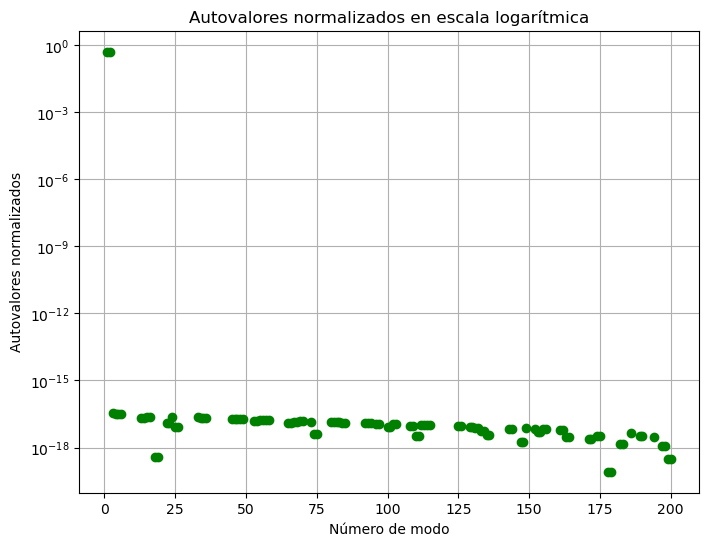

In [4]:
# Espectro de modos
# Calcula la suma de los autovalores
suma_autovalores = np.sum(autovalores)

# Normaliza los autovalores
autovalores_normalizados = autovalores / suma_autovalores

# Número de modos
num_modos = len(autovalores)

# Genera los números de modo para el eje horizontal
numeros_modos = np.arange(1, num_modos + 1)

# Grafica los autovalores normalizados en escala logarítmica
plt.figure(figsize=(8, 6))
plt.plot(numeros_modos, autovalores_normalizados, 'o', color = "green")
plt.yscale('log')
plt.xlabel('Número de modo')
plt.ylabel('Autovalores normalizados')
plt.title('Autovalores normalizados en escala logarítmica')
plt.grid(True)
plt.show()

# Modos dominantes
num_autovalores_importantes = 3
indices_autovalores_importantes = np.argsort(autovalores)[-num_autovalores_importantes:]
autovectores_importantes = autovectores[:, indices_autovalores_importantes]


9. Grafique los autovectores de los dos primeros modos encontrados. En el eje horizontal se debe mostrar el intervalo espacial y en el eje vertical las componentes del autovector. **Valor: 4 puntos**

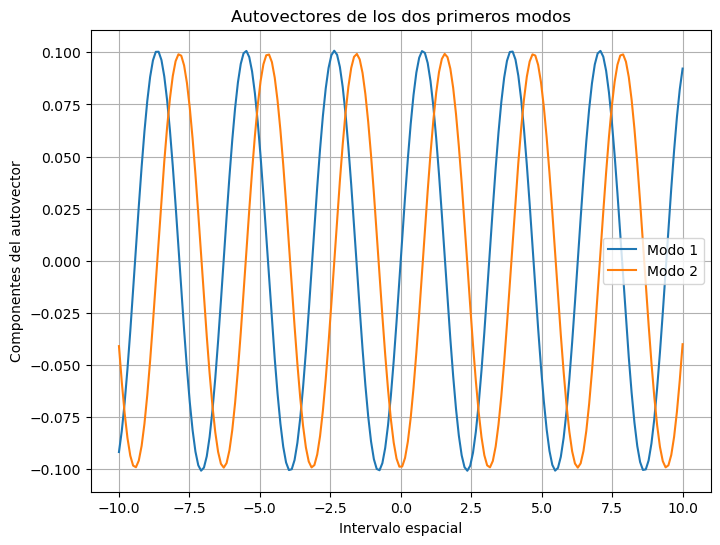

In [5]:
# Autovectores de los primeros modos

# Número de modos a graficar
num_modos_grafica = 2

# Graficar los autovectores de los modos encontrados
plt.figure(figsize=(8, 6))

for i in range(num_modos_grafica):
    modo = autovectores[:, i]
    plt.plot(x, modo, label='Modo {}'.format(i+1))

plt.xlabel('Intervalo espacial')
plt.ylabel('Componentes del autovector')
plt.title('Autovectores de los dos primeros modos')
plt.legend()
plt.grid(True)
plt.show()

10. Calcule los coeficientes modales _a_ como el producto punto de cada fila de _M_ por cada autovector correspondiente a los 2 primeros modos. Almacene los valores en una matriz $M_a$ de dimensiones (número de modos $\times$ número de _snapshots_). **Valor: 2 puntos**
11. Grafique los coeficientes _a_ contra el tiempo para cada modo. **Valor: 2 puntos**

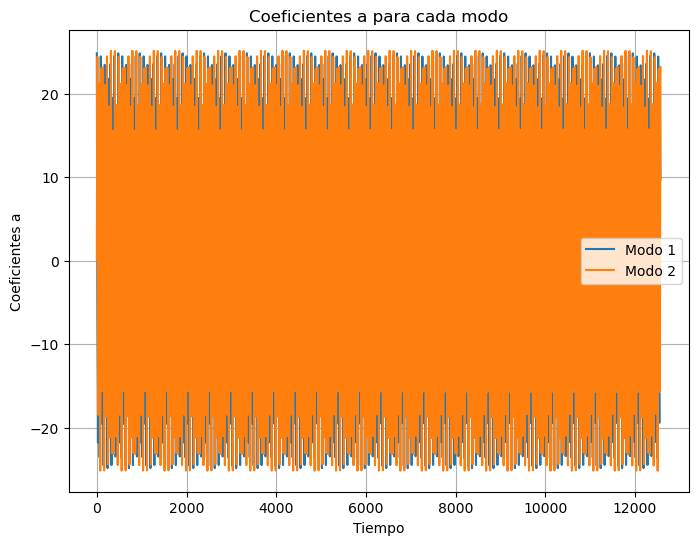

In [6]:
# Coeficientes modales
# Calcular los coeficientes modales a
num_modos_calculo_a = 2
Ma = np.dot(M, autovectores[:, :num_modos_calculo_a])

# Graficar los coeficientes a contra el tiempo para cada modo
plt.figure(figsize=(8, 6))

for i in range(num_modos_calculo_a):
    plt.plot(t, Ma[:, i], label='Modo {}'.format(i+1))

plt.xlabel('Tiempo')
plt.ylabel('Coeficientes a')
plt.title('Coeficientes a para cada modo')
plt.legend()
plt.grid(True)
plt.show()


12. Finalmente reconstruya la matriz M usando solo los primeros modos encontrados. Calcule el producto exterior entre el autovector y la fila de $M_a$, esto resulta en una matriz $M_1$ para el primer modo. Repita para el segundo modo para obtener $M_2$. Obtenga la nueva matriz M como $M_1 + M_2$. **Valor: 2 puntos**

In [7]:
# Recontrucción de M para dos modos
# Obtener los primeros modos
num_modos_reconstruccion = 2
modos = autovectores[:, :num_modos_reconstruccion]

# Calcular la matriz M1 para el primer modo
M1 = np.outer(modos[:, 0], Ma[:, 0])

# Calcular la matriz M2 para el segundo modo
M2 = np.outer(modos[:, 1], Ma[:, 1])

# Obtener la nueva matriz M
M_nueva = M1 + M2


13. Evalue la reconstrucción de M. Calcule la diferencia entre la matriz _M_ original y la reconstrucción e imprima el valor máximo entre todas las diferencias. Compare ese valor con el valor mínimo de la matriz M original y comente si la diferencia es significativa. **Valor: 1 punto**

In [8]:
# Evaluación del error
# Diferencia entre la matriz M original y la reconstrucción
M_diferencia = M - M_nueva.T
D = np.amax(M_diferencia)

# Compare ese valor mínimo de la matriz M original
d = np.amin(M)
print("Valor valor máximo entre todas las diferencias: ",D)
print("Valor mínimo de la matriz M original: ",d)


"""
La diferencia entre el valor máximo entre todas las diferencias de M original y la reconstrucción es despreciable en 
comparación con el valor mínimo de la matriz M original por lo cual podemos determinar que el método tiene un buen ajuste.
"""

Valor valor máximo entre todas las diferencias:  (8.362976977593917e-12+0j)
Valor mínimo de la matriz M original:  -2.4999999996338165


'\nLa diferencia entre el valor máximo entre todas las diferencias de M original y la reconstrucción es despreciable en \ncomparación con el valor mínimo de la matriz M original por lo cual podemos determinar que el método tiene un buen ajuste.\n'